In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/coursera-deep-learning-specialization-master/C1 - Neural Networks and Deep Learning/Week 3/Planar data classification with one hidden layer/

/content/drive/MyDrive/coursera-deep-learning-specialization-master/C1 - Neural Networks and Deep Learning/Week 3/Planar data classification with one hidden layer


In [ ]:
pwd

'/content/drive/MyDrive/coursera-deep-learning-specialization-master/C1 - Neural Networks and Deep Learning/Week 3/Planar data classification with one hidden layer'

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from testCases_v2 import *
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline
np.random.seed(1) 

In [ ]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [ ]:
X,Y =load_planar_dataset()

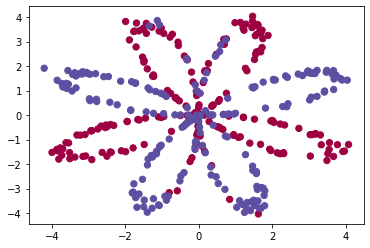

In [ ]:
# Visualize the data:
#plt.scatter(X,Y)
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [ ]:
x_shape = X.shape
print(x_shape)
y_shape = Y.shape
print(y_shape)

(2, 400)
(1, 400)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X.T, Y.T)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0]
Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


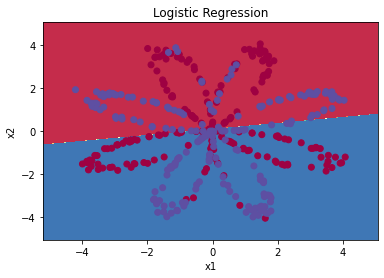

In [ ]:
plot_decision_boundary(lambda x:clf.predict(x),X,Y)
plt.title('Logistic Regression')
acc=clf.predict(X.T)
print(acc)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,acc) + np.dot(1-Y,1-acc))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Neural Network**

define number of neurons of input,hidden and output layer

In [ ]:
def neural_structure(X,Y):
  #no of neurons od input layer
  n_x = X.shape[0]
  n_h=4
  n_y=Y.shape[0]
  return (n_x,n_h,n_y)  

In [ ]:
X_ass, Y_ass = layer_sizes_test_case()
a,b,c=neural_structure(X_ass,Y_ass)
print("The size of the input layer is: n_x = " , a)
print('The size of the hidden layer is:n_h =', b)
print('the size of output layer is:n_y = ',c)

The size of the input layer is: n_x =  5
The size of the hidden layer is:n_h = 4
the size of output layer is:n_y =  2


**Model Parameters**

In [ ]:
def initialize_parameters(n_x,n_h,n_y):
   np.random.seed(2)
   W1=np.random.randn(n_h,n_x) * 0.01
   b1=np.zeros((n_h,1))
   W2=np.random.randn(n_y,n_h) * 0.01
   b2=np.zeros((n_y,1))

   assert (W1.shape == (n_h, n_x))
   assert (b1.shape == (n_h, 1))
   assert (W2.shape == (n_y, n_h))
   assert (b2.shape == (n_y, 1))
    
   parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
   return parameters

In [ ]:
n_x,n_h,n_y = initialize_parameters_test_case()
parameters=initialize_parameters(n_x,n_h,n_y)
print('W1',parameters["W1"])
print('b1',parameters["b1"])
print('W2',parameters["W2"])
print('b2',parameters["b2"])

W1 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 [[0.]
 [0.]
 [0.]
 [0.]]
W2 [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 [[0.]]


**forward Propgation**

In [ ]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1=np.dot(W1,X)+ b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+ b2
    A2=sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}

    return A2, cache

In [ ]:
X_ass, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_ass, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


In [ ]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    a1 = np.log(A2)
    a2 = np.log(1-A2)
    z1 = np.multiply(Y,a1)+np.multiply((1-Y),a2)
    cost=-1/m *np.sum(z1)
    ### END CODE HERE ###
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [ ]:
A2, Y_ass, parameters = compute_cost_test_case()
output=compute_cost(A2,Y_ass,parameters)
print("cost = " ,output)

cost =  0.6930587610394646


In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [ ]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [ ]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1=W1-learning_rate * dW1
    b1=b1-learning_rate * db1
    W2=W2-learning_rate * dW2
    b2=b2-learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
parameters,grads = update_parameters_test_case()
learning_rate=1.2
parameters = update_parameters(parameters,grads,learning_rate)

print("updated parameters = ",parameters)

updated parameters =  {'W1': array([[-0.00643025,  0.01936718],
       [-0.02410458,  0.03978052],
       [-0.01653973, -0.02096177],
       [ 0.01046864, -0.05990141]]), 'b1': array([[-1.02420756e-06],
       [ 1.27373948e-05],
       [ 8.32996807e-07],
       [-3.20136836e-06]]), 'W2': array([[-0.01041081, -0.04463285,  0.01758031,  0.04747113]]), 'b2': array([[0.00010457]])}
